In [28]:
import pandas as pd
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Model
from tensorflow.keras.layers import Input,Activation,Add, MaxPooling2D, Flatten, Dense

In [3]:
#Import image labels and paths to dataframe
mypath = './Data/CroppedImages/'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)

In [4]:
filedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     23705 non-null  object
 1   gender  23705 non-null  object
 2   race    23705 non-null  object
 3   file    23705 non-null  object
dtypes: object(4)
memory usage: 740.9+ KB


In [5]:
filedf['agebracket'] = filedf['age'].astype(int).floordiv(20)

In [6]:
filedf.describe()

,agebracket
count,23705.000000
mean,1.254461
std,0.962140
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [7]:
filedf.head()

,age,gender,race,file,agebracket
0,100,0,0,./Data/CroppedImages/100_0_0_20170112213500903...,5
1,100,0,0,./Data/CroppedImages/100_0_0_20170112215240346...,5
2,100,1,0,./Data/CroppedImages/100_1_0_20170110183726390...,5
3,100,1,0,./Data/CroppedImages/100_1_0_20170112213001988...,5
4,100,1,0,./Data/CroppedImages/100_1_0_20170112213303693...,5


In [8]:
images = []
labels = []

In [9]:
for index, row in filedf.iterrows():
    img = np.array(Image.open(row[3]))
    flat_img = img
    images.append(img)
    labels.append([row[1],row[2],row[4]])

In [10]:
npimages = np.array(images)
nplabels = np.array(labels).astype(int)

In [11]:
X = npimages
y = nplabels

In [248]:
ymodel = np.array([[[x[0]],[x[1]],[x[2]]] for x in y])
ymodel.shape

(23705, 3, 1)

In [254]:
y_train2=[y_train[:,0],y_train[:,1],y_train[:,2]]
y_test2=[y_test[:,0],y_test[:,1],y_test[:,2]]

In [257]:
print(np.unique(y_train2[0]))
print(np.unique(y_train2[1]))
print(np.unique(y_train2[2]))

[0 1]
[0 1 2 3 4]
[0 1 2 3 4 5]


In [21]:
#Simplifies adding a layer
def Convolution(input_tensor,filters):

    x = layers.Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same', activation = 'relu')(input_tensor)

    return x

#Simple CNN model
#Conv stands for neural network layers of (x,y). x standing for the input layers and y standing for how many filter layers there are
#maxp is a pooling layer that reduces the number of nodes of the next layer
#flatten changes the previous layer to a 1 dimensional layer
#dense layers have each node connected to every node in the previous layer. In this case, we have 3 dense layers of differing weights representing
#age, gender, and race. While all previous layers have collected features, dense layers calculate based on these collected features.
#They then send their calculations to the final dense layer to determine classification
#Binary Crossentropy = Classifies based on a binary value
#Sparse Categorical Crossentropy = Classifies based on an integer value with more than 2 possible values
def Simplemodel(input_shape):

  inputs = Input((input_shape))

  conv_1= Convolution(inputs,32)

  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)

  conv_2 = Convolution(maxp_1,64)

  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)

  conv_3 = Convolution(maxp_2,64)

  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)

  conv_4 = Convolution(maxp_3,64)

  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)

  conv_5 = Convolution(maxp_4,64)

  flatten= Flatten() (conv_5)

  dense_1= Dense(64,activation='relu')(flatten)

  dense_2= Dense(64,activation='relu')(flatten)

  dense_3= Dense(64,activation='relu')(flatten)

  output_1= Dense(1,activation="sigmoid",name='sex_out')(dense_1)

  output_2= Dense(5,activation="sigmoid",name='race_out')(dense_2)
    
  output_3= Dense(6,activation="sigmoid",name='age_out')(dense_3)

  model = Model(inputs=[inputs], outputs=[output_1,output_2,output_3])

  model.compile(loss=["binary_crossentropy","sparse_categorical_crossentropy", "sparse_categorical_crossentropy"], optimizer="Adam",

  metrics=["accuracy"])

  return model

In [29]:
#Creating the model
Modelsimple=Simplemodel((200,200,3))
Modelsimple.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_21 (Conv2D)             (None, 200, 200, 32  896         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_16 (MaxPooling2D  (None, 100, 100, 32  0          ['conv2d_21[0][0]']              
 )                              )                                                             

In [267]:
#Training the model
SimpleHistory=Modelsimple.fit(X_train,y_train_conv,validation_data=(X_test,y_test_conv),epochs=10)

Epoch 1/10
497/497 [==============================] - 927s 2s/step - loss: 4.6951 - sex_out_loss: 0.7956 - race_out_loss: 1.8392 - age_out_loss: 1.8076 - sex_out_accuracy: 0.7753 - race_out_accuracy: 0.5735 - age_out_accuracy: 0.5869 - val_loss: 2.6125 - val_sex_out_loss: 0.4147 - val_race_out_loss: 1.0210 - val_age_out_loss: 0.9625 - val_sex_out_accuracy: 0.8222 - val_race_out_accuracy: 0.6609 - val_age_out_accuracy: 0.6451
Epoch 2/10
497/497 [==============================] - 902s 2s/step - loss: 2.3334 - sex_out_loss: 0.3497 - race_out_loss: 0.9111 - age_out_loss: 0.8773 - sex_out_accuracy: 0.8432 - race_out_accuracy: 0.6779 - age_out_accuracy: 0.6564 - val_loss: 2.2343 - val_sex_out_loss: 0.3454 - val_race_out_loss: 0.8628 - val_age_out_loss: 0.8453 - val_sex_out_accuracy: 0.8429 - val_race_out_accuracy: 0.7037 - val_age_out_accuracy: 0.6840
Epoch 3/10
497/497 [==============================] - 893s 2s/step - loss: 2.1574 - sex_out_loss: 0.3296 - race_out_loss: 0.8393 - age_out_los

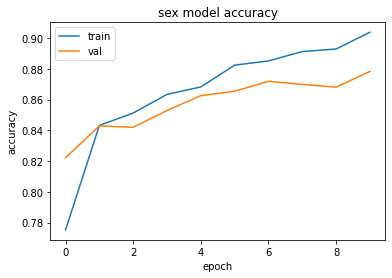

In [268]:
#Sex accuracy metric
plt.plot(SimpleHistory.history['sex_out_accuracy'])
plt.plot(SimpleHistory.history['val_sex_out_accuracy'])
plt.title('sex model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

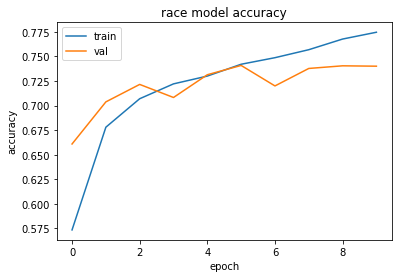

In [269]:
#Race accuracy metric
plt.plot(SimpleHistory.history['race_out_accuracy'])
plt.plot(SimpleHistory.history['val_race_out_accuracy'])
plt.title('race model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

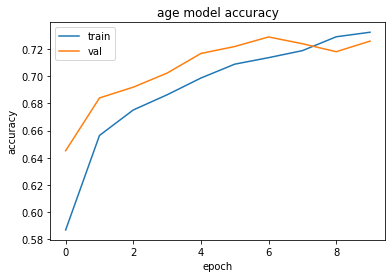

In [270]:
#Age accuracy metric
plt.plot(SimpleHistory.history['age_out_accuracy'])
plt.plot(SimpleHistory.history['val_age_out_accuracy'])
plt.title('age model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [271]:
#Confusion Matrices
ypred = Modelsimple.predict(X_test)

In [295]:
y_gender_classes = np.round(ypred[0])
y_race_classes = np.argmax(ypred[1],axis=-1)
y_age_classes = np.argmax(ypred[2],axis=-1)

In [296]:
print('gender confusion matrix')
print(confusion_matrix(y_test_conv[0],y_gender_classes))

gender confusion matrix
[[3459  625]
 [ 327 3412]]


In [292]:
print('race confusion matrix')
print(confusion_matrix(y_test_conv[1],y_race_classes))

race confusion matrix
[[2922  105   47  170   27]
 [ 154 1231   12   99    8]
 [ 271   52  725   41   36]
 [ 326  123    9  864   10]
 [ 344   57   17  126   47]]


In [293]:
print('age confusion matrix')
print(confusion_matrix(y_test_conv[2],y_age_classes))

age confusion matrix
[[1176  317   16    8    4    0]
 [  83 3596  242   14    3    0]
 [  20  714  660   81    3    0]
 [  17  125  300  199   31    0]
 [   9   15   49   84   47    0]
 [   1    0    1    4    4    0]]
